In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import joblib

In [2]:
data = pd.read_csv("../datasets/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
np.unique(data['target'] , return_counts=True)

(array([0, 1], dtype=int64), array([138, 164], dtype=int64))

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


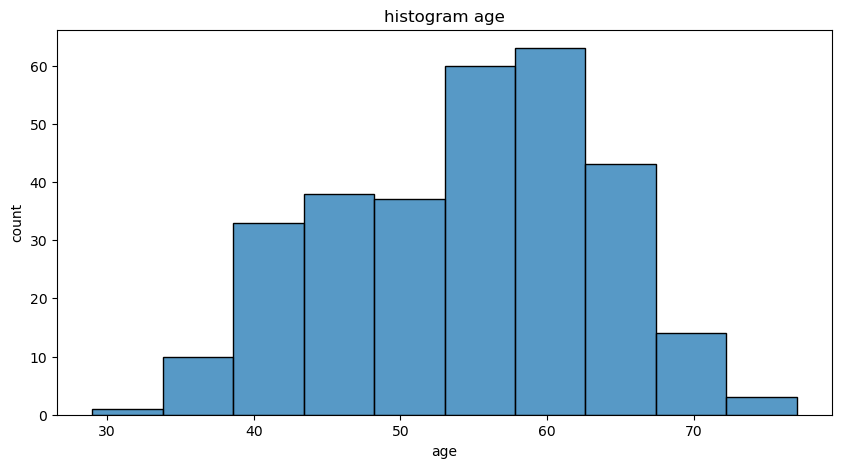

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='age', bins=10)
plt.title('histogram age')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

<Figure size 1000x500 with 0 Axes>

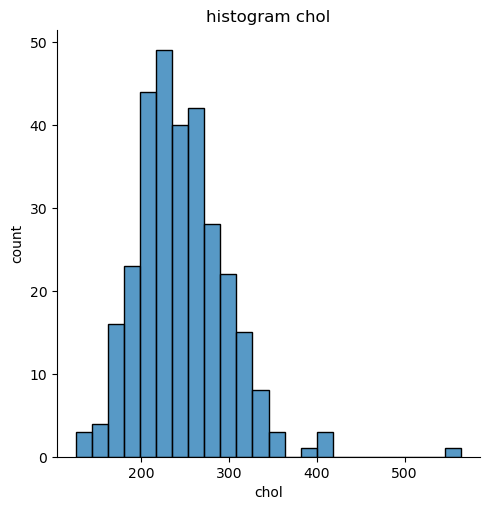

In [12]:
plt.figure(figsize=(10,5))
sns.displot(data['chol'])
plt.title('histogram chol')
plt.xlabel('chol')
plt.ylabel('count')
plt.show()

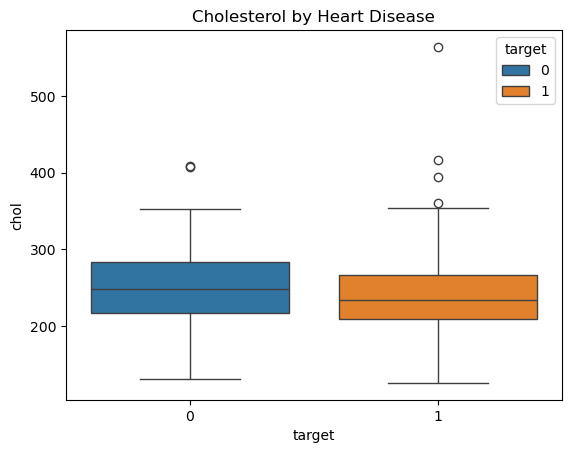

In [13]:
sns.boxplot(x='target', y='chol', data=data , hue='target')
plt.title('Cholesterol by Heart Disease')
plt.show()

<Axes: xlabel='thalach', ylabel='chol'>

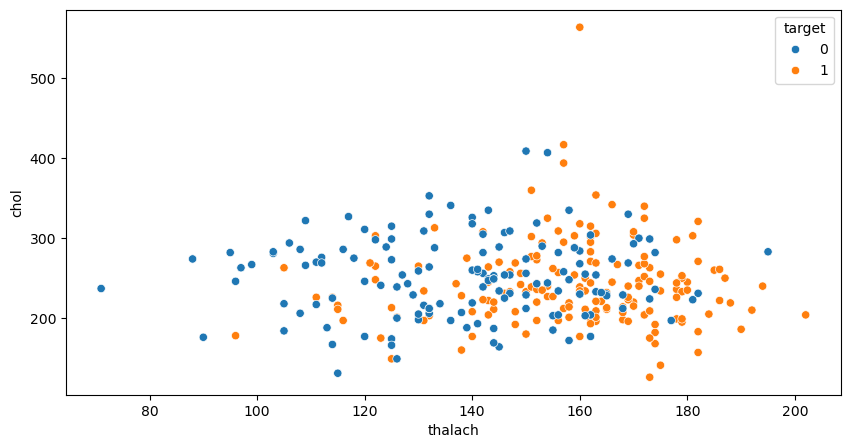

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data , x='thalach' , y='chol' , hue='target')

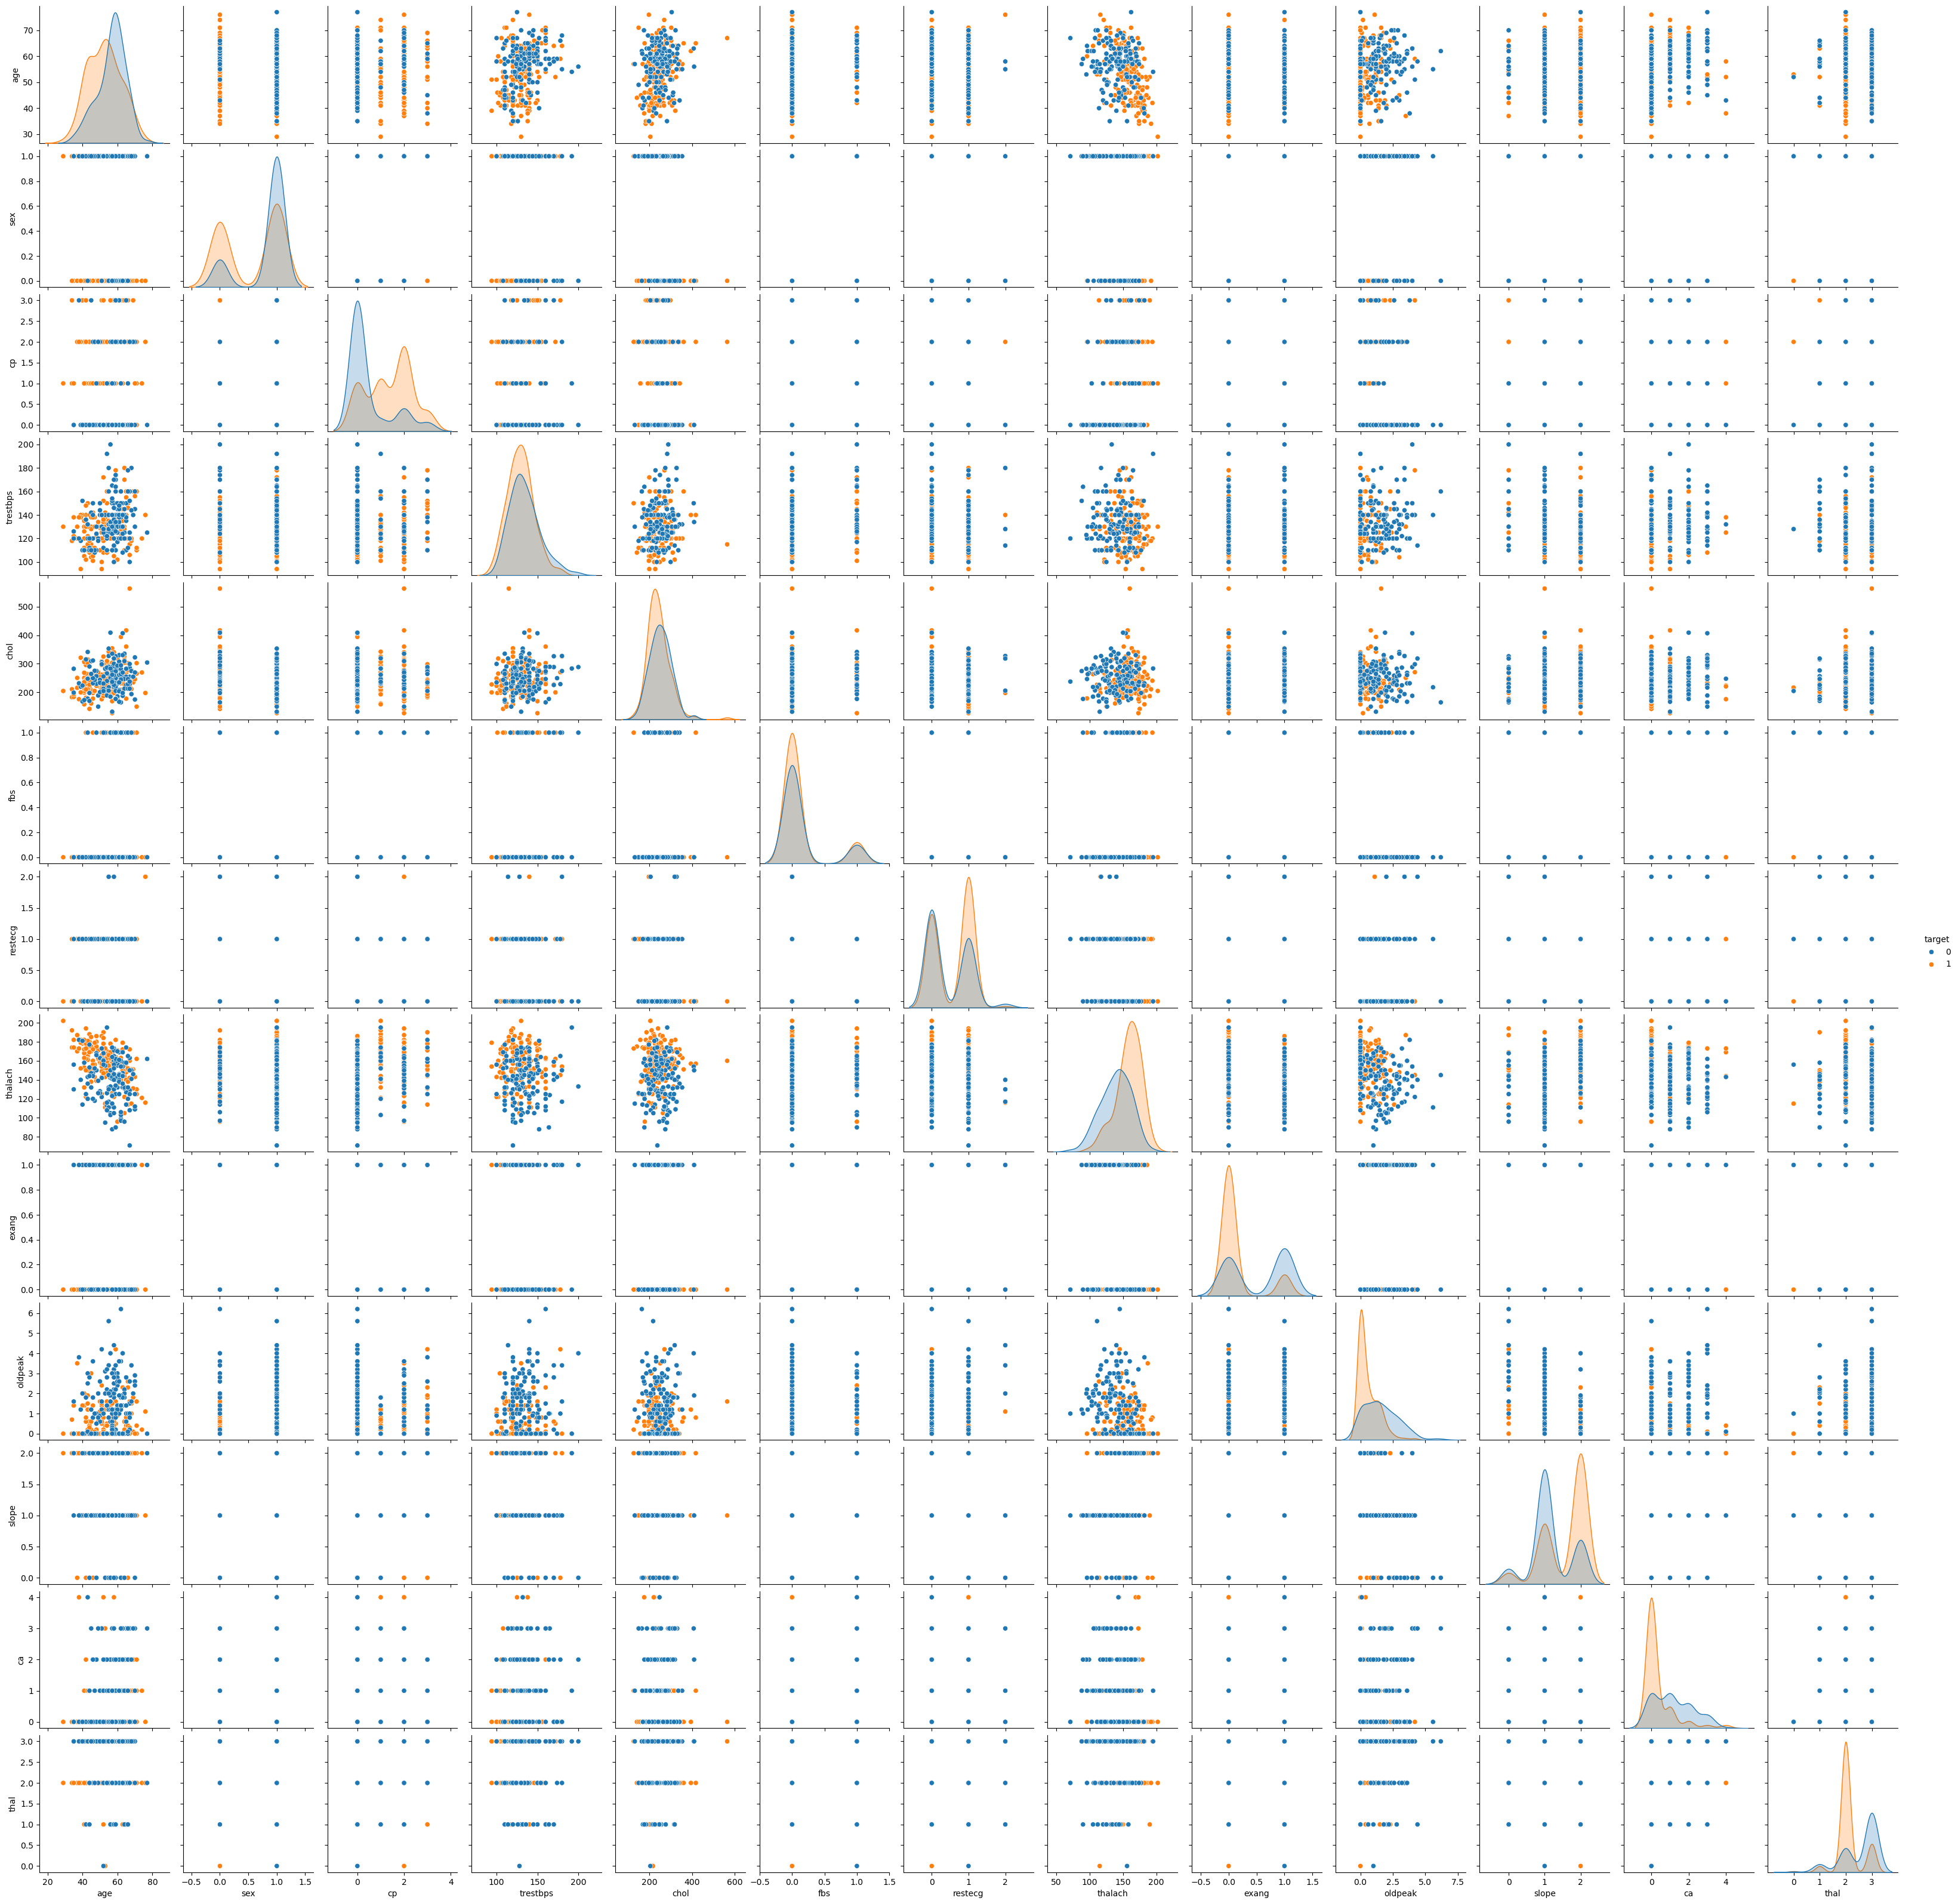

In [15]:
sns.pairplot(data , hue='target')

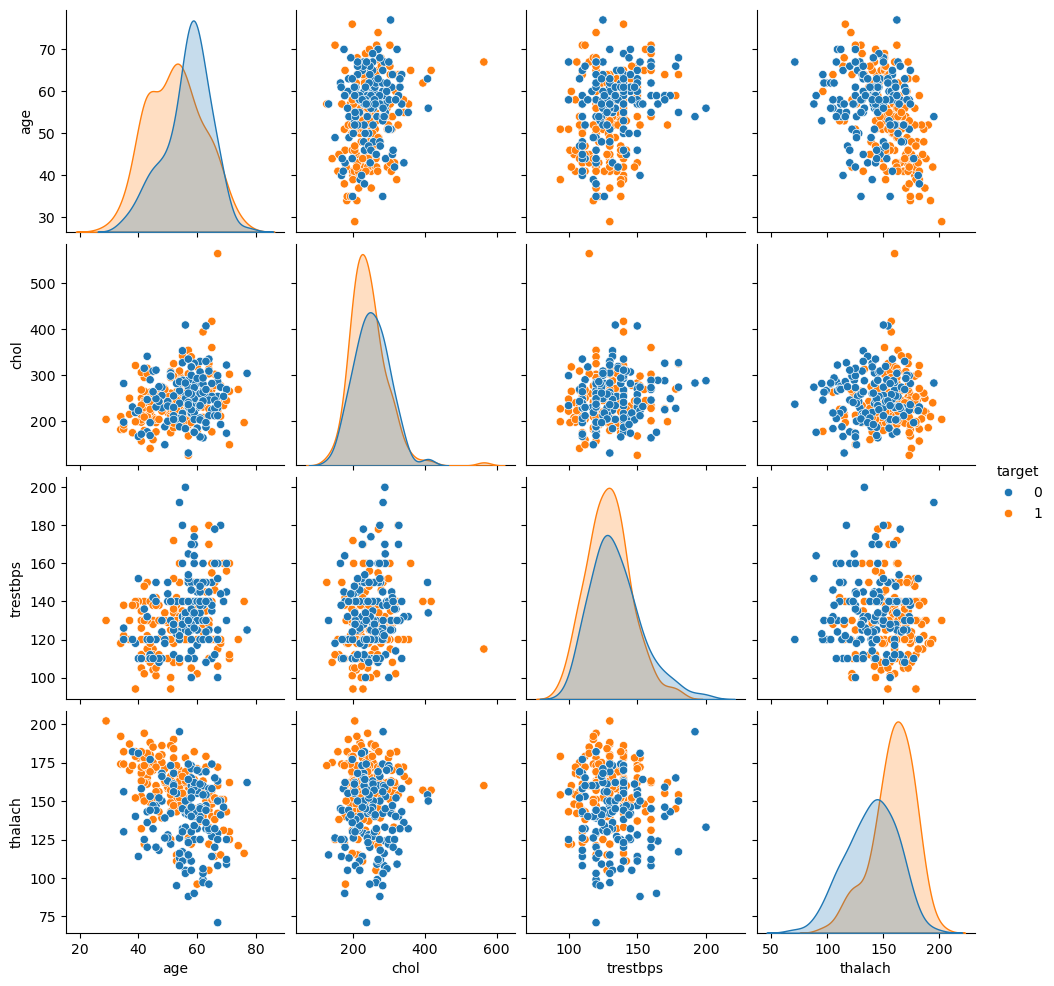

In [16]:
sns.pairplot(data[['age', 'chol', 'trestbps', 'thalach', 'target']], hue='target')
plt.show()

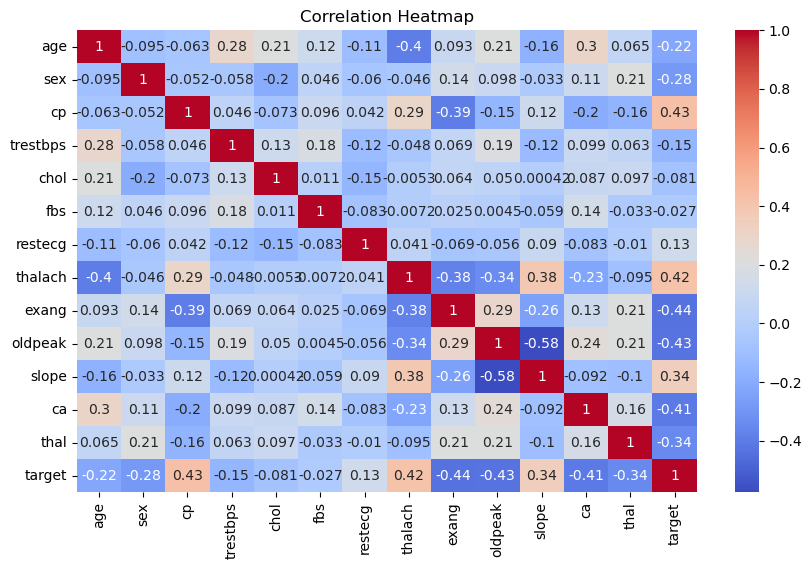

In [17]:
correlation = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

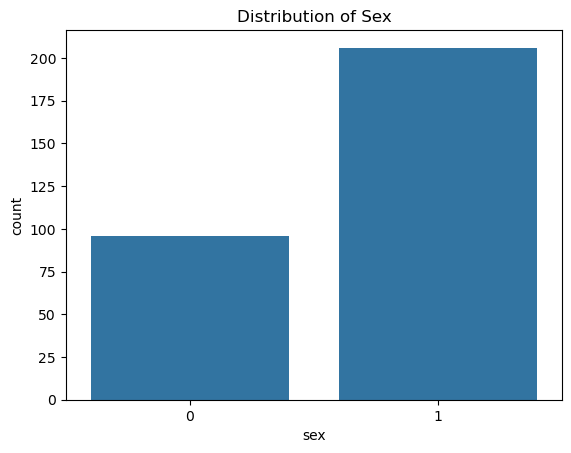

In [18]:
sns.countplot(x='sex', data=data)
plt.title('Distribution of Sex')
plt.show()

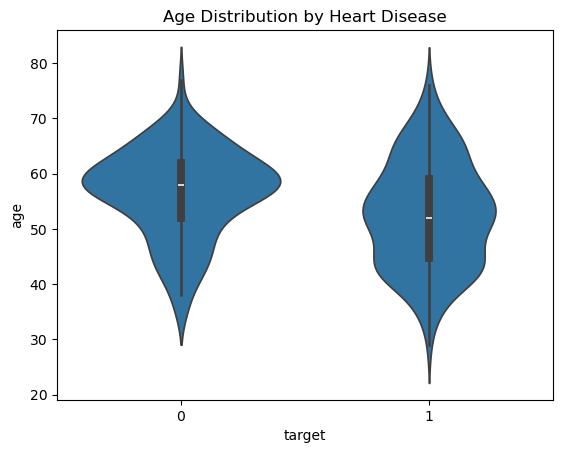

In [19]:
sns.violinplot(x='target', y='age', data=data)
plt.title('Age Distribution by Heart Disease')
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


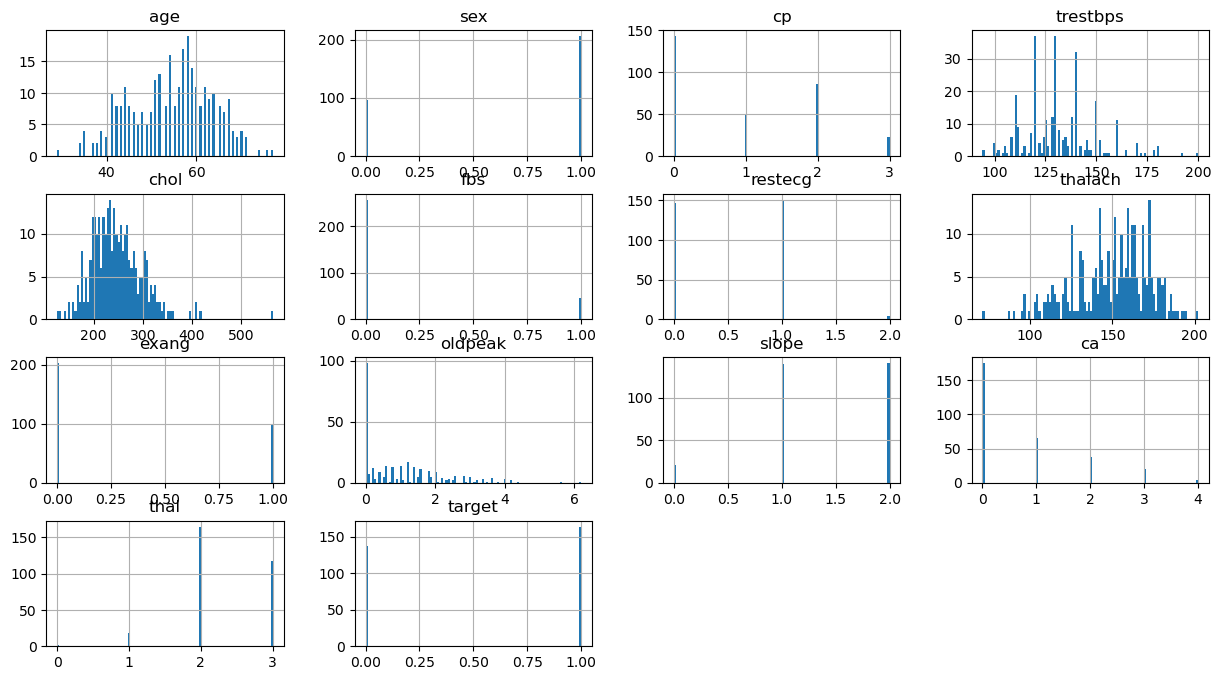

In [21]:
data.hist(bins=100 , figsize=(15 , 8))
plt.show()

In [22]:
# X = data.iloc[:,:-1]
# Y = data.target

# def make_pipeline(X  , base_model=LogisticRegression()):

#     prep = ColumnTransformer(transformers=[('scale' , StandardScaler() , X.columns)])

#     pipeline = Pipeline(steps=[('preprocessing' , prep) , ('model' , base_model)])

#     return pipeline

In [ ]:
# preprocessing.py
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# --- Feature Engineering ---
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    data = data.copy()

    # ویژگی‌های ترکیبی
    data['age_chol_ratio'] = data['chol'] / (data['age'] + 1)
    data['bp_chol_product'] = data['trestbps'] * data['chol']
    data['restecg_thalach_diff'] = data['thalach'] - data['trestbps']

    # باینری‌سازی
    data['high_chol_flag'] = (data['chol'] > 240).astype(int)
    data['high_bp_flag'] = (data['trestbps'] > 130).astype(int)
    data['low_thalach_flag'] = (data['thalach'] < 120).astype(int)

    # تعامل ویژگی‌ها
    data['age_exercise_risk'] = data['age'] * data['exang']
    data['st_slope_risk'] = data['oldpeak'] * data['slope']

    return data

# --- Preprocessing & Pipeline ---
def preprocessing_pipeline(data: pd.DataFrame, target_col: str = "target", base_model=None):
    if base_model is None:
        base_model = LogisticRegression(max_iter=1000)

    # حذف رکوردهای تکراری
    data = data.drop_duplicates()

    # جدا کردن X و y
    X = data.drop(columns=[target_col])
    y = data[target_col]

    # اجرای Feature Engineering
    X_eng = feature_engineering(X)

    # ساخت ColumnTransformer
    prep = ColumnTransformer(transformers=[
        ('scale', StandardScaler(), X_eng.columns)
    ])

    # ساخت Pipeline
    pipeline = Pipeline(steps=[
        ('preprocessing', prep),
        ('model', base_model)
    ])

    return pipeline, X_eng, y



# مثال استفاده:
# pipeline = make_pipeline(X)
# pipeline.fit(X, Y)


In [24]:
def plot_feature_importance(model, feature_names, top_n=20):


    model = pipeline.named_steps['model']

    # سعی می‌کنه feature importance یا coef_ رو بخونه
    try:
        importances = model.feature_importances_
    except AttributeError:
        importances = model.coef_[0]  # برای LogisticRegression
        importances = np.abs(importances)

    # مرتب‌سازی
    indices = np.argsort(importances)[-top_n:]

    # رسم نمودار
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title('Top Important Features')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [25]:
def hyperparametr_search(model , param , x_train , y_train):
    grid_search = GridSearchCV(model , cv=4 ,param_grid=param,  scoring='accuracy' , n_jobs=-1 , verbose=0)
    grid_search.fit(x_train , y_train)


    y_pred = grid_search.predict(x_test)
    print(classification_report(y_test , y_pred))

    print(f'best param is {grid_search.best_params_} and best score is {grid_search.best_score_}')



    return grid_search

In [ ]:
def results(pipeline , x_test , y_test , x_train):


    y_pred = pipeline.predict(x_test)
    print('classification_report : \n' , classification_report(y_true=y_test , y_pred=y_pred))

    cm = confusion_matrix(y_test , y_pred)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    y_preds = pipeline.predict_proba(x_test)[:,1]
    fpr , tpr , _ = roc_curve(y_test , y_preds)
    roc_auc = auc(fpr , tpr)
    plt.plot(fpr, tpr, label=f'roc curve (AUC {roc_auc:.2f})' , color = 'darkorange')
    plt.plot([0,1] , [0,1] , linestyle = '--' , color = 'gray')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()


    plot_feature_importance(model=pipeline, feature_names=x_train.columns)
    plt.show()

classification_report : 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



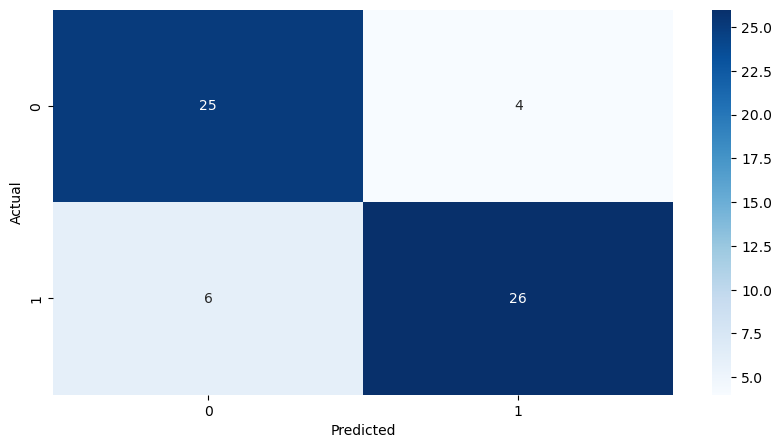

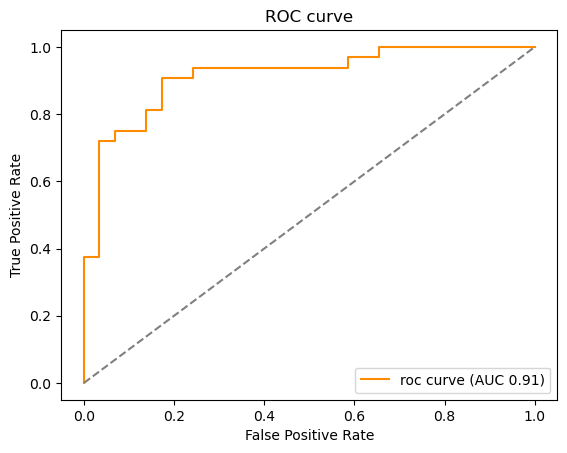

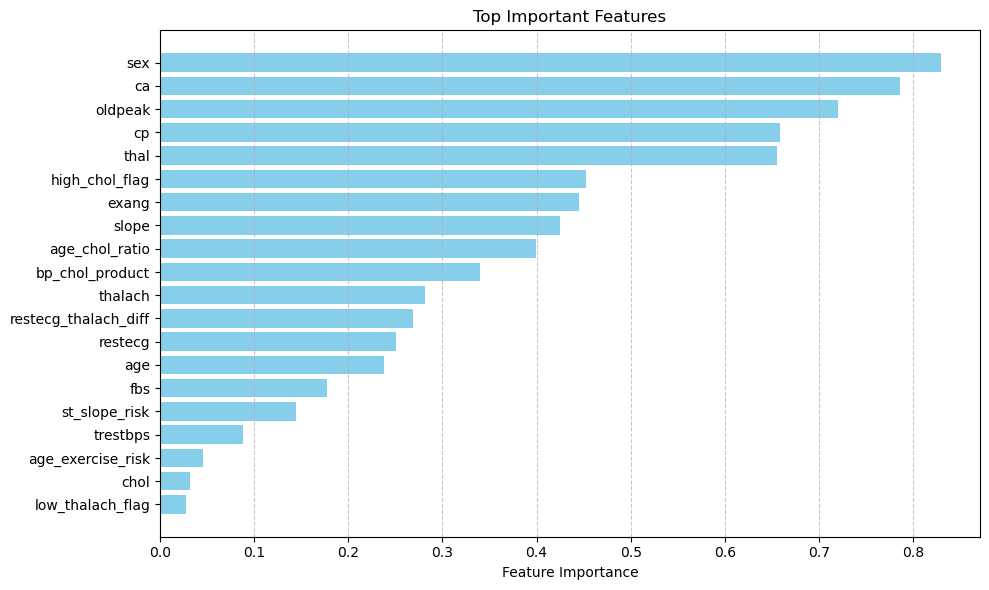

In [27]:
X = data.drop('target' , axis=1)
Y = data.target

pipeline= make_pipeline(X=X)


X = feature_engineering(X) 
x_train , x_test , y_train , y_test = train_test_split(X , Y , train_size=0.8 , random_state=42)

pipeline.fit(x_train , y_train)

results(pipeline=pipeline , x_test=x_test , y_test=y_test , x_train=x_train)


In [28]:
param_grid = [
    {
        'model__penalty': ['l1'],
        'model__solver': ['liblinear', 'saga'],
        'model__C': [0.01, 0.1, 1, 10],
        'model__max_iter': [100, 200]
    },
    {
        'model__penalty': ['l2'],
        'model__solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
        'model__C': [0.01, 0.1, 1, 10],
        'model__max_iter': [100, 200]
    },
    {
        'model__penalty': ['elasticnet'],
        'model__solver': ['saga'],
        'model__l1_ratio': [0.0, 0.5, 1.0],
        'model__C': [0.01, 0.1, 1, 10],
        'model__max_iter': [100, 200]
    }
]


grid_search = hyperparametr_search(model=pipeline,param=param_grid, x_train=x_train, y_train=y_train)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

best param is {'model__C': 1, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'} and best score is 0.8547814207650274


In [29]:
pipeline_tfc= make_pipeline(base_model=RandomForestClassifier() , X=X)
pipeline_tfc

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_chol_ratio',
       'bp_chol_product', 'restecg_thalach_diff', 'high_chol_flag',
       'high_bp_flag', 'low_thalach_flag', 'age_exercise_risk',
       'st_slope_risk'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

c:\Users\T A T\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1728 fits failed out of a total of 5184.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1082 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\T A T\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\T A T\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\T A T\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimat

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

best param is {'model__bootstrap': True, 'model__criterion': 'entropy', 'model__max_depth': 30, 'model__max_features': 'log2', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100} and best score is 0.8340846994535519
classification_report : 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



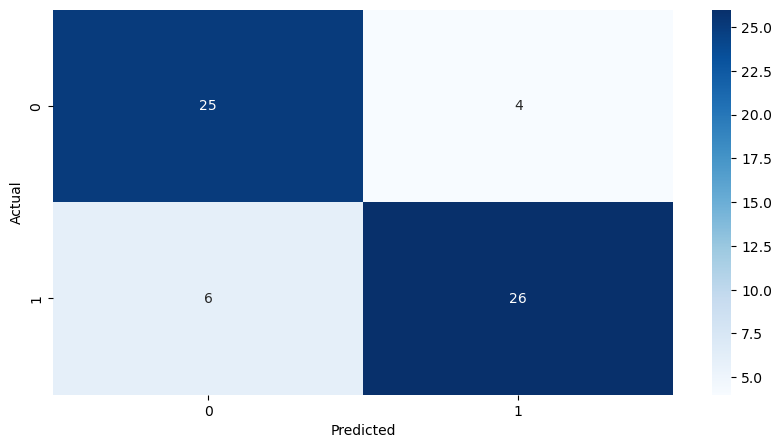

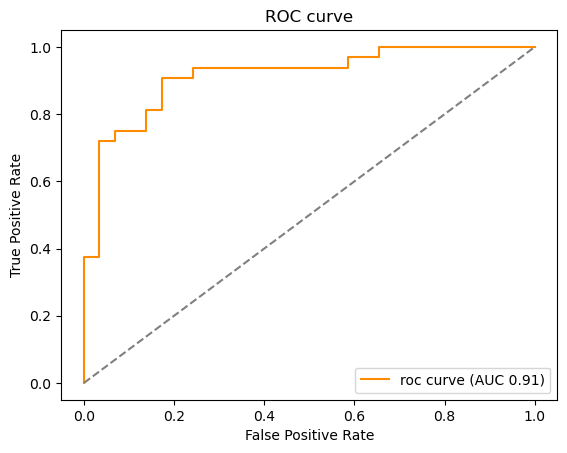

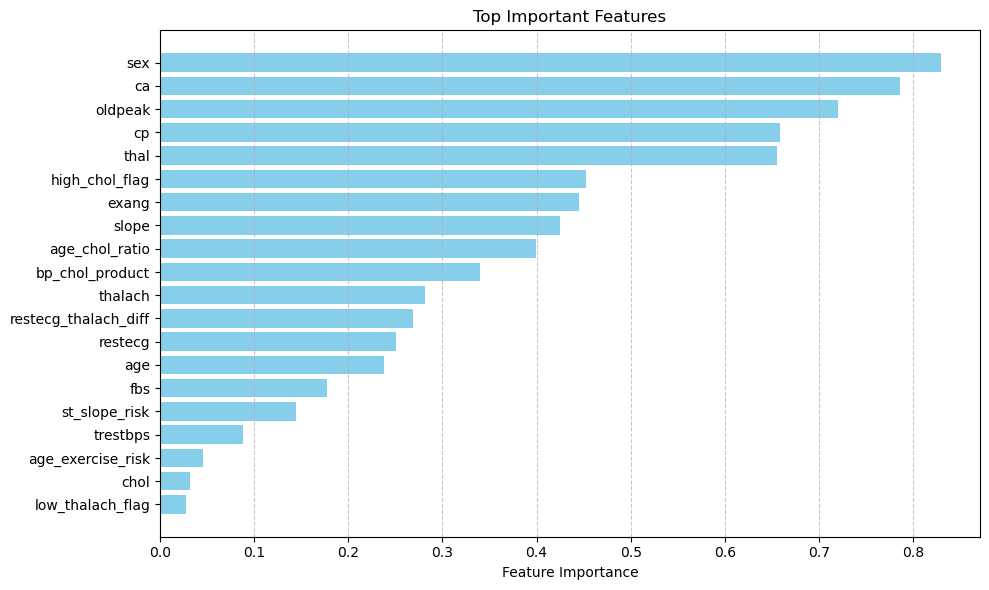

In [30]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__bootstrap': [True, False],
    'model__criterion': ['gini', 'entropy']  # یا 'log_loss' برای نسخه‌های جدید
}

grid_search = hyperparametr_search(model=pipeline_tfc,param=param_grid, x_train=x_train, y_train=y_train)
results(pipeline=pipeline , x_test=x_test , y_test=y_test , x_train=x_train)


0:	learn: 0.8560606	total: 120ms	remaining: 35.9s
75:	learn: 0.9772727	total: 219ms	remaining: 644ms
150:	learn: 1.0000000	total: 272ms	remaining: 269ms
225:	learn: 1.0000000	total: 327ms	remaining: 107ms
299:	learn: 1.0000000	total: 382ms	remaining: 0us
classification_report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



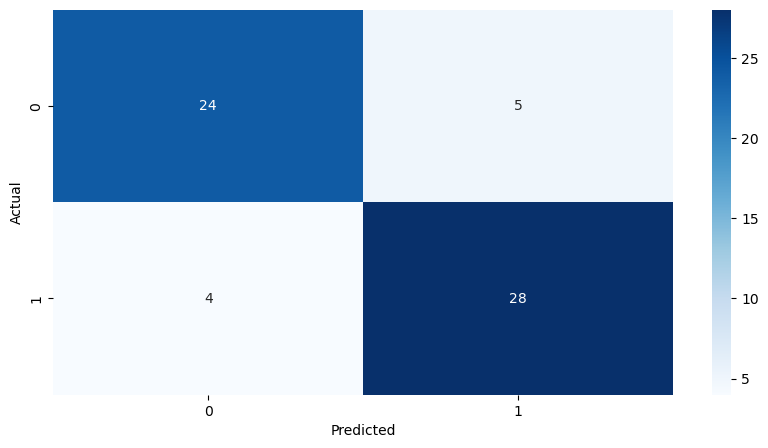

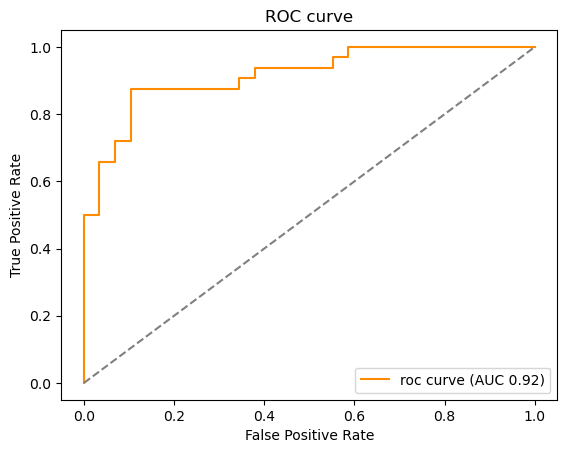

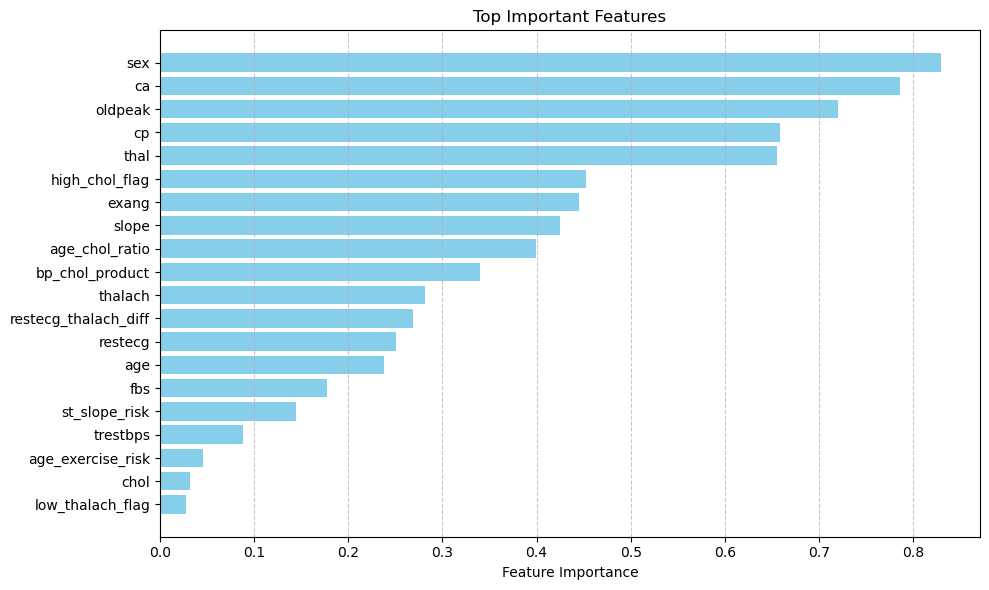

In [31]:
pipeline_cat = make_pipeline(base_model=CatBoostClassifier(iterations=300,
                              learning_rate=0.05,
                              depth=4,
                              l2_leaf_reg=2,
                              eval_metric='Recall',
                              bagging_temperature = 0.2,
                              od_type='Iter',
                              metric_period = 75,
                              od_wait=100,
                              random_state=42) , X=X)
pipeline_cat.fit(x_train , y_train)



results(pipeline=pipeline_cat , x_test=x_test , y_test=y_test , x_train=x_train)


0:	learn: 0.8560606	test: 0.7812500	best: 0.7812500 (0)	total: 1.19ms	remaining: 357ms
75:	learn: 0.9772727	test: 0.8750000	best: 0.9062500 (7)	total: 63.8ms	remaining: 188ms
150:	learn: 1.0000000	test: 0.8437500	best: 0.9062500 (7)	total: 117ms	remaining: 116ms
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.90625
bestIteration = 7

Shrink model to first 8 iterations.
classification_report : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



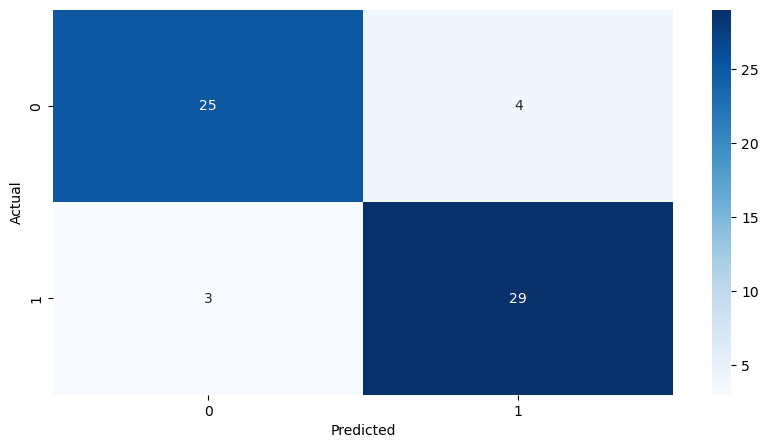

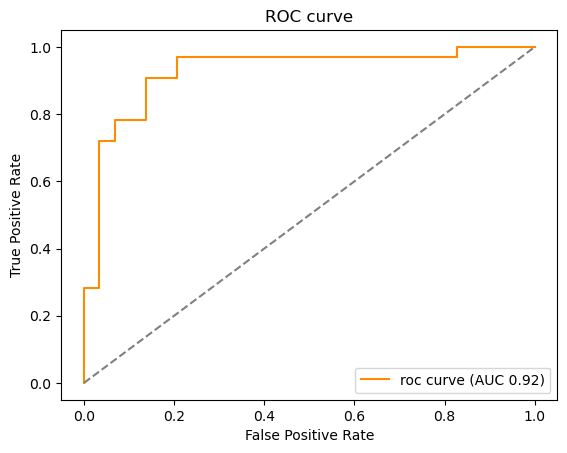

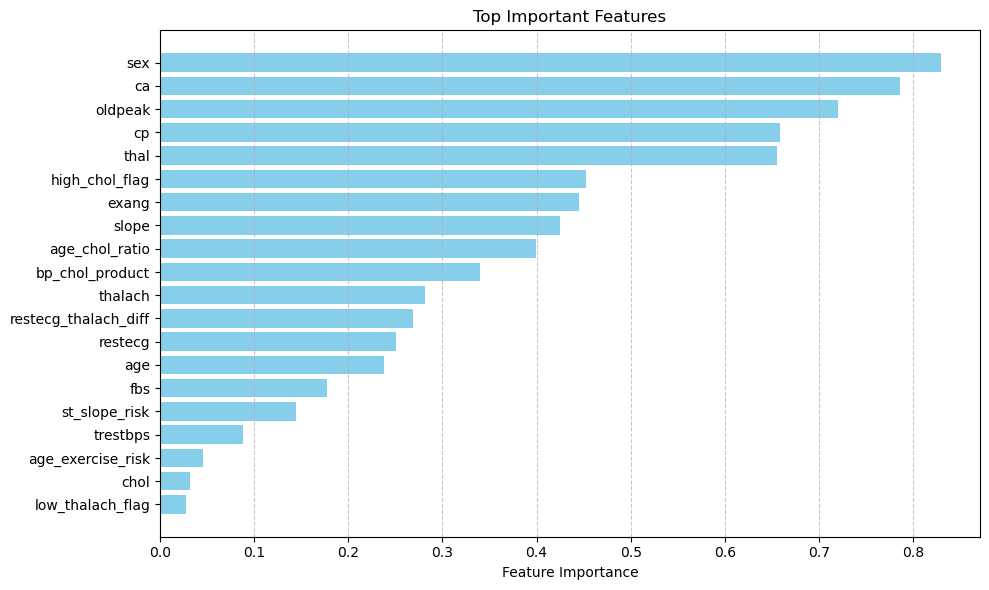

In [32]:
catboost_model = CatBoostClassifier(iterations=300,
                              learning_rate=0.05,
                              depth=4,
                              l2_leaf_reg=2,
                              eval_metric='Recall',
                              bagging_temperature = 0.2,
                              od_type='Iter',
                              metric_period = 75,
                              od_wait=100,
                              random_state=42)
catboost_model.fit(x_train, y_train, eval_set=(x_test , y_test), early_stopping_rounds=200)


results(pipeline=catboost_model , x_test=x_test , y_test=y_test , x_train=x_train)

In [33]:
joblib.dump(catboost_model, 'heart_pipeline_model.pkl')

['heart_pipeline_model.pkl']